# 지도학습 실습 - Logistic Regression

# 1. Import Library

In [ ]:
# 필요 라이브러리 설치 및 확인 
# 데이터를 정리하기 위한 라이브러리 호출
!pip install pandas
# 데이터를 계산하기 위한 라이브러리 호출
!pip install numpy
# 데이터를 plotting하기 위한 라이브러리 2개 호출
!pip install matplotlib
!pip install seaborn
# 데이터를 분석하기 위한 라이브러리 호출
!pip install scikit-learn

In [2]:
# 필요 라이브러리 호출
# 위에서 확인한 4가지를 호출해 봅시다
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Scikit-learn에서 필요한 라이브러리들을 호출해봅시다.
# 데이터셋과 Logistic regresssion 라이브러리를 호출해 봅시다.
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# 데이터를 학습과 추정을 위한 셋트로 분리하는 라이브러리를 호출해 봅시다.
from sklearn.model_selection import train_test_split

# 모델을 평가하고 확인하는 라이브러리를 호출해 봅시다.
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 
from sklearn.semi_supervised import LabelSpreading
from sklearn.semi_supervised import SelfTrainingClassifier

from sklearn.inspection import DecisionBoundaryDisplay

# 2. Data Load

- 기계학습에서 가장 기본적으로 사용되는 데이터인 iris를 사용해봅시다

In [4]:
# 데이터셋에서 iris를 호출해 봅시다.
iris = datasets.load_iris()

In [5]:
# iris 데이터 셋을 확인해 봅시다.
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [6]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [7]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


- 데이터를 가시화 해봅시다

In [9]:
# 가시화를 위해 우선 두개의 피쳐만을 선택해 봅시다
X = iris.data[:, :2]
# 지도학습을 위한 target을 결정해 봅시다
y = iris.target

In [10]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5 # 가시화 결과에 좌우 여백을 주어 봅시다
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5 # 가시화 결과에 상하 여백을 주어 봅시다

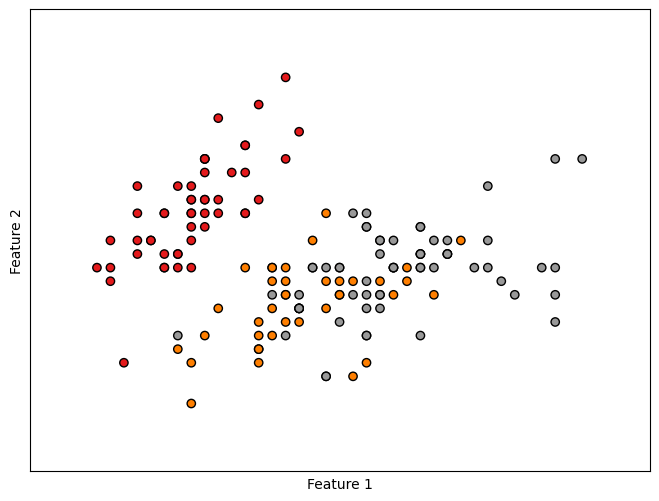

In [11]:
# (8,6)크기로 그래프를 그려봅시다
plt.figure(1, figsize=(8, 6))

# 그래프 초기화
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

#그래프 좌우/상하 길이 결정
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# 그래프 눈금은 없도록 결정
plt.xticks(())
plt.yticks(())

# 그래프 출력
plt.show()

In [12]:
# 데이터를 학습과 평가 데이터 세트로 분류
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0, stratify=y)

# 3. Model Building

- Logistic regression 라이브러리를 사용하여 모델을 학습시켜 봅시다 

In [13]:
#가장 기본 Logistic regression을 만들어봅시다 
clf = LogisticRegression()

In [14]:
#전체 데이터를 사용해 모델을 학습해 봅시다 - 데이터 분석
clf.fit(X,y)

LogisticRegression()

In [15]:
#모델의 예측 결과를 확인해봅시다
predictions = clf.predict(X)

In [16]:
#모델의 정확도를 '직접 ' 계산해 봅시다
sum(predictions==y)/len(y)

0.82

In [17]:
#모델의 정확도를 '라이브러리로' 확인해 봅시다
accuracy_score(y,predictions)

0.82

- 위에서 사용된 데이터트 2개의 피쳐만을 사용하였을 때입니다.
- 만약 모든 피쳐를 사용한다면 어떻게 될까요?

In [18]:
# 모든 피쳐의 데이터를 선택해 봅시다
X = iris.data
# 지도학습을 위한 target을 결정해 봅시다
y = iris.target

In [19]:
# 데이터를 학습과 평가 데이터 세트로 분류
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0, stratify=y)

In [21]:
# 모델을 만들고 정확도를 확인해 봅시다
clf = LogisticRegression(penalty='l2', solver='lbfgs')
clf.fit(X,y)
predictions = clf.predict(X)
accuracy_score(y,predictions)

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9733333333333334

- 학습 데이터 세트와 평가 데이터 세트를 사용하여 봅시다

In [22]:
#학습 데이터 세트를 사용하여 모델을 학습시켜봅시다
clf.fit(X_train,y_train)

#평가 데이터 세트를 사용하여 모델의 성능을 확인하여 봅시다
predictions = clf.predict(X_test)

#모델의 성능을 confusion matrix로 확인하여 봅시다
cm = confusion_matrix(y_test, predictions)
print(cm)

[[13  0  0]
 [ 0 13  0]
 [ 0  0 12]]


/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


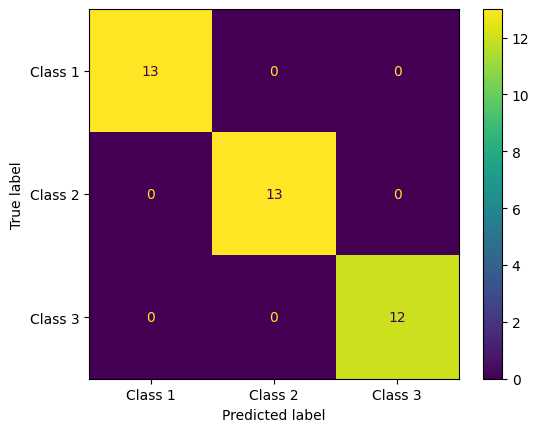

In [23]:
# ConfusionMatrixDisplay를 사용하여 시각적 표현 성능을 올려봅시다
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 1","Class 2","Class 3"])
disp.plot()

![nn](colormap.png)

<Axes: >

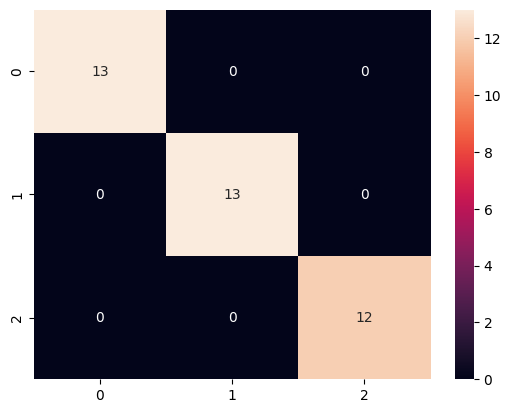

In [24]:
# seaborn 라이브러리로 표현해 봅시다
sns.heatmap(cm, annot=True)

<Axes: >

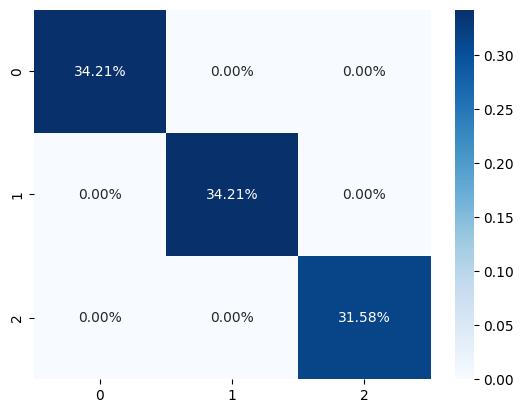

In [25]:
#갯수 대신 확률로 표현해 봅시다
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

<Axes: >

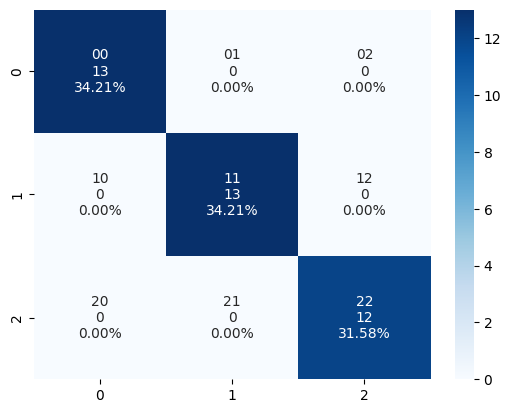

In [26]:
# Confusion matrix에는 동시에 여러가지 정보를 입력할수도 있습니다.
group_names = ['00','01','02','10','11','12','20','21','22']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

# 4. Hyperparameter Tuning

- 학습된 모델의 성능에 기반하여 최적의 파라메터와 모델을 골라봅시다

In [27]:
# 모델 간 성능의 가시화를 위해 우선 두개의 피쳐만을 선택해 봅시다
X = iris.data[:, :2]
# 지도학습을 위한 target을 결정해 봅시다
y = iris.target
# 데이터를 학습과 평가로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0, stratify=y)

In [28]:
# Logistic Regression의 페널티와 solver을 바꾸어 가며 모델을 학습시켜 봅시다
models = (    
    LogisticRegression(penalty='l2', solver='lbfgs'),
    LogisticRegression(penalty='l2', solver='newton-cholesky'),
    LogisticRegression(penalty='l2', solver='saga'),
    LogisticRegression(penalty='l1', solver='saga'),
)

#모델을 동시에 학습시켜 봅시다
models = (clf.fit(X_train, y_train) for clf in models)

In [29]:
# 각 모델의 이름을 기록해둡시다.
titles = (
    "LogisticRegression with l2 (lbfgs)",
    "LogisticRegression with l2 (newton-cholesky)",
    "LogisticRegression with l2 (saga)",
    "LogisticRegression with l1 (saga)",
)

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


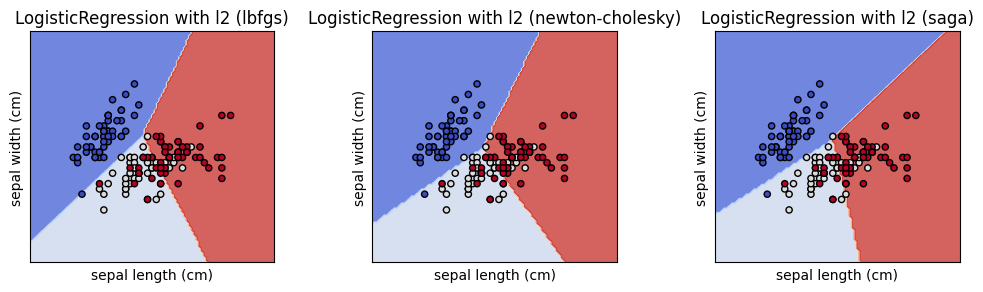

In [30]:
#비교 그림을 그려봅시다. (1X3)
fig, sub = plt.subplots(1, 3, figsize=(12,3))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

#두 개의 피쳐를 x축, y축이 될 수 있도록 선택하여 줍니다.
X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    # Decision boundary display method를 사용하여 결과를 가시화해 봅시다
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    #실제 데이터 결과를 뿌려서 표현하여 줍니다.
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

- 우리는 가시화를 위해 2개의 피쳐만을 선택하였습니다.
- 이번에는 가시화를 포기하고 모든 피쳐를 다 사용하여 보도록 합시다.

In [31]:
# 데이터 셋팅
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0, stratify=y)

In [32]:
# Logistic Regression 모델 셋팅
models = (
    LogisticRegression(penalty='l2', solver='lbfgs'),
    LogisticRegression(penalty='l2', solver='newton-cholesky'),
    LogisticRegression(penalty='l2', solver='saga'),
    LogisticRegression(penalty='l1', solver='saga'),
)
models = (clf.fit(X_train, y_train) for clf in models)

In [33]:
for clf, title in zip(models, titles):
    clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)
    print("모델 종류 : {}, 정확도 : {}".format(title,accuracy_score(y_test,predictions)))

모델 종류 : LogisticRegression with l2 (lbfgs), 정확도 : 1.0
모델 종류 : LogisticRegression with l2 (newton-cholesky), 정확도 : 0.9210526315789473
모델 종류 : LogisticRegression with l2 (saga), 정확도 : 1.0
모델 종류 : LogisticRegression with l1 (saga), 정확도 : 1.0


/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

- 다른 데이터를 사용해 봅시다 (과제: datasets의 wine data, digits, breast_cancer를 사용해보기)

In [34]:
# wine data를 호출하여 봅시다.
wine = datasets.load_wine()

In [35]:
# 데이터 셋팅
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0, stratify=y)

In [36]:
# Logistic Regression 모델 셋팅
models = (
    LogisticRegression(penalty='l2', solver='lbfgs'),
    LogisticRegression(penalty='l2', solver='newton-cholesky'),
    LogisticRegression(penalty='l2', solver='saga'),
    LogisticRegression(penalty='l1', solver='saga'),
)
models = (clf.fit(X_train, y_train) for clf in models)

In [37]:
for clf, title in zip(models, titles):
    clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)
    print("모델 종류 : {}, 정확도 : {}".format(title,accuracy_score(y_test,predictions)))

모델 종류 : LogisticRegression with l2 (lbfgs), 정확도 : 0.9333333333333333
모델 종류 : LogisticRegression with l2 (newton-cholesky), 정확도 : 0.9777777777777777
모델 종류 : LogisticRegression with l2 (saga), 정확도 : 0.6666666666666666
모델 종류 : LogisticRegression with l1 (saga), 정확도 : 0.6444444444444445


/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 